In [1]:
import pandas as pd
import utils.plotting as pl
import utils.process as pp

file_proccessed = 'ida_first_gym.csv'

data= pd.read_csv(file_proccessed)
data = pp.add_missing_labels(data)
data = data[data['label'] != 'none']
data.reset_index(inplace=True)

#window_data = pp.split_dataframe_into_sliding_windows(data, "20s")

FileNotFoundError: [Errno 2] No such file or directory: 'ida_first_gym.csv'

In [35]:
folder = 'plots/'
pl.plot_with_labels(data, folder + file_proccessed)

In [3]:
# Create Cross Validation Plots 

import matplotlib.pyplot as plt
import pandas as pd

cv_metrics = pd.read_csv('cv_metrics.csv')

cv_metrics 

,n_estimators,max_depth,window,accuracy,mse,falling_correct,walking_correct,running_correct,sitting_correct,standing_correct,laying_correct,recover_correct
0,50,10,20,0.976759,0.261466,0.918149,0.989002,0.983111,0.983643,0.975977,0.969969,0.956739
1,50,10,50,0.949986,0.254188,0.837742,0.975810,0.768881,0.965427,0.939910,0.941087,0.889804
2,50,10,100,0.915736,0.246372,0.720472,0.953109,0.950204,0.954735,0.882952,0.900475,0.823592
3,50,10,200,0.877640,0.234446,0.658104,0.911771,0.720747,0.925844,0.818081,0.911551,0.820942
4,50,15,20,0.975958,0.265352,0.907385,0.988672,0.789597,0.985955,0.973537,0.967306,0.950843
5,50,15,50,0.947166,0.257096,0.814086,0.972254,0.966736,0.955718,0.947472,0.918772,0.891682
6,50,15,100,0.912123,0.249052,0.689402,0.949448,0.949868,0.941515,0.898239,0.895389,0.825482
7,50,15,200,0.874250,0.235493,0.658352,0.893558,0.658092,0.885935,0.843614,0.895458,0.789672
8,50,20,20,0.975505,0.265094,0.883644,0.988483,0.978621,0.983712,0.976819,0.966075,0.945475
9,50,20,50,0.948050,0.257420,0.814111,0.973417,0.780590,0.935195,0.947390,0.933599,0.884690


In [ ]:
# Find highest accuracy score
max_score = cv_metrics['accuracy'].max()

cv_metrics[cv_metrics['accuracy'] == max_score]

,n_estimators,max_depth,window,accuracy,mse,falling_correct,walking_correct,running_correct,sitting_correct,standing_correct,laying_correct,recover_correct
24,200,10,20,0.977963,0.260631,0.893832,0.989591,0.782329,0.986541,0.979748,0.968602,0.950625


In [24]:
# Find highest lowest mse score
min_mse = cv_metrics['mse'].min()

cv_metrics[cv_metrics['mse'] == min_mse]

,n_estimators,max_depth,window,accuracy,mse,falling_correct,walking_correct,running_correct,sitting_correct,standing_correct,laying_correct,recover_correct
19,100,15,200,0.868498,0.232319,0.554282,0.909546,0.709717,0.734908,0.827033,0.917653,0.805257


In [25]:
# Find best Falling score
max_falling = cv_metrics['falling_correct'].max()

cv_metrics[cv_metrics['falling_correct'] == max_falling]

,n_estimators,max_depth,window,accuracy,mse,falling_correct,walking_correct,running_correct,sitting_correct,standing_correct,laying_correct,recover_correct
0,50,10,20,0.976759,0.261466,0.918149,0.989002,0.983111,0.983643,0.975977,0.969969,0.956739


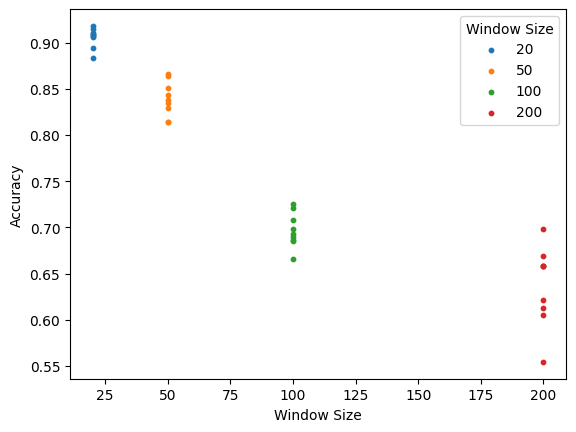

In [11]:
# grouped by window size
grouped = cv_metrics.groupby('window')

for name, group in grouped:
    plt.scatter(group['window'], group['falling_correct'], label=name, s=10)

plt.xlabel('Window Size')
plt.ylabel('Accuracy')
plt.legend(title='Window Size')

Text(0, 0.5, 'Accuracy')

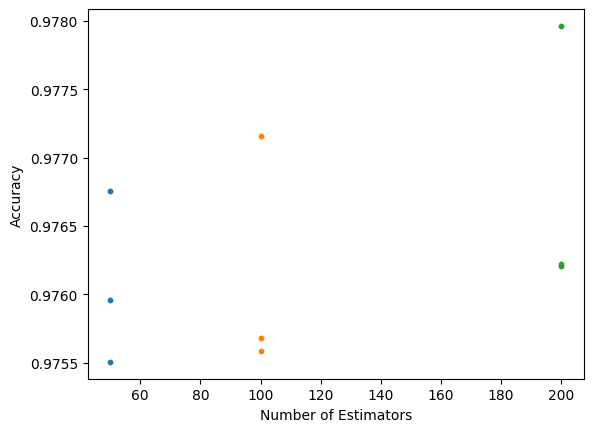

In [18]:
# grouped by estimators
grouped = cv_metrics[cv_metrics["window"] == 20].groupby('n_estimators')

for name, group in grouped:
    plt.scatter(group['n_estimators'], group['accuracy'], label=name, s=10)

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

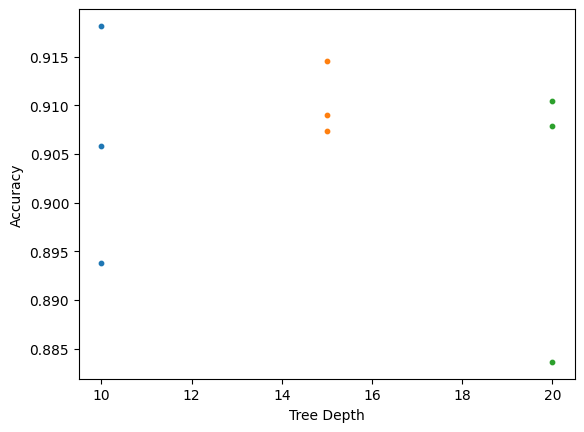

In [26]:
# grouped by max_depth
grouped = cv_metrics[cv_metrics["window"] == 20].groupby('max_depth')

for name, group in grouped:
    plt.scatter(group['max_depth'], group['falling_correct'], label=name, s=10)

plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')